In [1]:
import torch
import numpy as np

In [9]:
r0 = torch.tensor(1.0).float()

print(type(r0))
print(r0.dtype)
print(r0.shape)
print(r0.data)

<class 'torch.Tensor'>
torch.float32
torch.Size([])
tensor(1.)


In [10]:
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np)

r1 = torch.tensor(r1_np).float()
print(r1.dtype)
print(r1.shape)
print(r1.data)

[1 2 3 4 5]
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [11]:
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

r2 = torch.tensor(r2_np).float()
print(r2.shape)
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [12]:
torch.manual_seed(123)

r3 = torch.randn(3, 2, 2)
print(r3.shape)
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [13]:
r4 = torch.ones((2, 3, 2, 2))
print(r4.shape)
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


In [14]:
r5 = r1.long()
print(r5.dtype)
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


In [15]:
print(r3.shape)

r6 = r3.view(3, -1)
print(r6.shape)
print(r6.data)

torch.Size([3, 2, 2])
torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [16]:
print(r3.shape)

r7 = r3.view(-1)
print(r7.shape)
print(r7.data)

torch.Size([3, 2, 2])
torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [18]:
print('required_grad: ', r1.requires_grad)
print('device: ', r1.device)

required_grad:  False
device:  cpu


In [19]:
item = r0.item()
print(type(item))
print(item)

<class 'float'>
1.0


In [20]:
print(r1.item())

ValueError: only one element tensors can be converted to Python scalars

In [21]:
t1 = torch.ones(1)
print(t1.shape)
print(t1.item())

torch.Size([1])
1.0


In [22]:
print(r2)
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [23]:
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [24]:
print(torch.max(r2, 1)[1])

tensor([2, 0])


In [25]:
r2_np = r2.data.numpy()
print(type(r2_np))
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


In [28]:
x_np = np.arange(-2, 2.1, 0.25)
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [29]:
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


In [30]:
y = 2 * x**2 + 2
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


In [31]:
import matplotlib.pyplot as plt

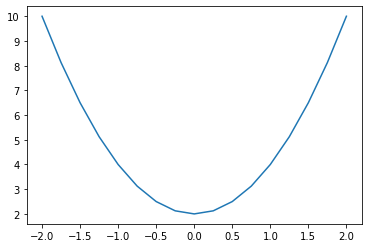

In [33]:
plt.plot(x.data, y.data)
plt.show()

In [36]:
z = y.sum()

In [37]:
from torchviz import make_dot

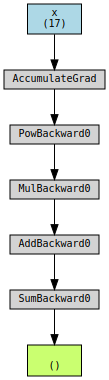

In [40]:
g = make_dot(z, params={'x': x})
display(g)

In [41]:
z.backward()

In [42]:
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


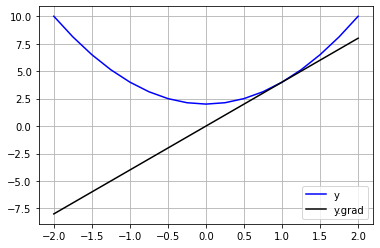

In [44]:
plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.grid()
plt.show()

In [45]:
# 勾配値が足されていく
y = 2 * x**2 + 2
z = y.sum()
z.backward()

print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [46]:
x.grad.zero_()

y = 2 * x**2 + 2
z = y.sum()
z.backward()

print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


In [47]:
sigmoid = torch.nn.Sigmoid()

In [48]:
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


In [55]:
x.grad.zero_()
y = sigmoid(x)
print(y)

tensor([0.1192, 0.1480, 0.1824, 0.2227, 0.2689, 0.3208, 0.3775, 0.4378, 0.5000,
        0.5622, 0.6225, 0.6792, 0.7311, 0.7773, 0.8176, 0.8520, 0.8808],
       grad_fn=<SigmoidBackward>)


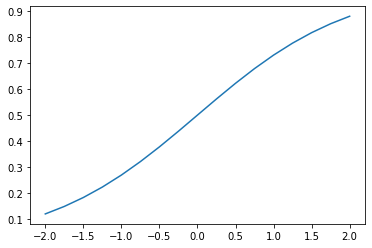

In [56]:
plt.plot(x.data, y.data)
plt.show()

In [57]:
z = y.sum()

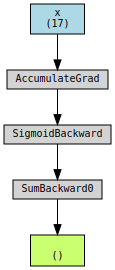

In [58]:
g = make_dot(z, params={'x': x})
display(g)

In [59]:
z.backward()
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


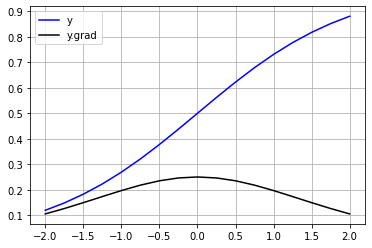

In [60]:
plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.grid()

plt.show()